## 特定年份上证指数走势图

在 [时间序列分析：上证综合指数时序特征分析](..\TS_SZ_index.ipynb) 中，我们展示了如何绘制上证综合指数的走势图 (1991-2025)。

有时候，为了引导读者将注意力集中于特定年份，我们需要将这些年份的数据进行拼接。以下代码块展示了如何实现这一点。


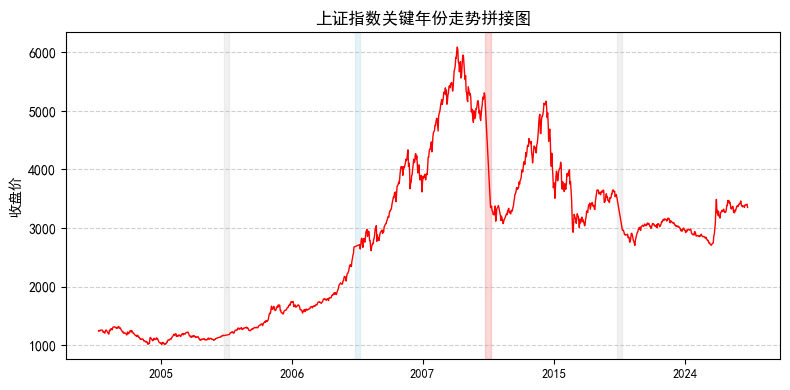

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
# 屏蔽警告信息
import warnings
warnings.filterwarnings("ignore")

# 设置 matplotlib 字体以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 获取并预处理上证指数数据
sz_index = ak.stock_zh_index_daily(symbol="sh000001")
sz_index.rename(columns={'date': 'day', 'close': 'close'}, inplace=True)
sz_index['day'] = pd.to_datetime(sz_index['day'])
sz_index['year'] = sz_index['day'].dt.year

# 设置目标年份
years_to_plot = [2005, 2006, 2007, 2015, 2024]

# 拼接数据并添加“虚拟日期索引”以实现连续绘图
plot_data = []
separators = []  # 记录断点位置
tick_positions = []
tick_labels = []

current_index = 0
for year in years_to_plot:
    temp = sz_index[sz_index['year'] == year].copy()
    temp['plot_index'] = range(current_index, current_index + len(temp))
    plot_data.append(temp)
    
    # 记录 tick 和 label 用于横轴标注
    mid = current_index + len(temp) // 2
    tick_positions.append(mid)
    tick_labels.append(str(year))
    
    current_index += len(temp)
    separators.append(current_index)
    current_index += 10  # 年份之间插入空白区

# 合并数据
df_all = pd.concat(plot_data)

# 绘图
plt.figure(figsize=(8, 4))
plt.plot(df_all['plot_index'], df_all['close'], 
         color='red', linewidth=1)  # 红色趋势线

# 定义间隔带颜色（按顺序：淡灰、淡蓝、淡红）
separator_colors = ['lightgrey', 'lightblue', 'lightcoral']

# 插入不同颜色的间隔带
for i, sep in enumerate(separators[:-1]):
    plt.axvspan(sep, sep + 10, 
                color=separator_colors[i % len(separator_colors)], 
                alpha=0.3)

# 美化
plt.xticks(tick_positions, tick_labels, fontsize=9)
plt.ylabel("收盘价", fontsize=10)
plt.title("上证指数关键年份走势拼接图", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# 保存图片
plt.savefig('../figs/sz_index_daily_return_selected_years.png')

# 显示图片
plt.show()